# Non-Negative Matrix Factorization

Factorization of a non-negative matrix into 

$x = WH$

using **multiplicative weights update algorithm**.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
plt.style.use('ggplot')
%matplotlib inline

In [2]:
# hyperparameters
n_dim = 5
it = 200

In [3]:
x = load_wine()['data']
x.shape # actual data shape

(178, 13)

In [4]:
np.any(np.min(x,axis=0) < 0) # check nonnegativity

False

In [5]:
# get number of features (columns)
n_ft = x.shape[1]
n_samp = x.shape[0]

In [6]:
# x = WH
W = np.random.uniform(0,1,(n_samp,n_dim))
H = np.random.uniform(0,1,(n_dim,n_ft))

In [7]:
# Multiplicative Update Rule (Lee and Seung)
for i in range(it):
    # Update H
    H = H*np.dot(W.T,x)/np.dot(np.dot(W.T,W),H)

    # Update W
    W = W*np.dot(x,H.T)/np.dot(np.dot(W,H),H.T)
    
    if i % 20 == 0:
        print(np.sum(x - np.dot(W,H))**2) # check error (frobenius norm)

305344.7444170026
4737555.187545797
626766.8583509036
116702.92253226296
40065.00107019392
24309.112284585444
19801.352721907733
17436.487509050596
15863.317947761267
14842.592095024349


In [8]:
# Reproduce the matrix
x_2 = np.dot(W,H)
x_2.shape

(178, 13)

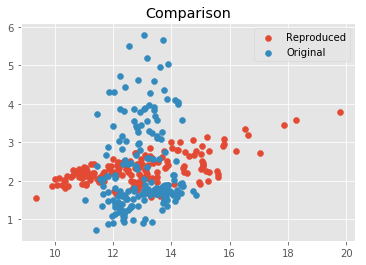

In [9]:
# just for comparison, plot first two features
plt.scatter(x_2[:,0],x_2[:,1],label='Reproduced')
plt.scatter(x[:,0],x[:,1],label='Original')
plt.title('Comparison')
plt.legend()
plt.show()